In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns

In [2]:
df=pd.read_csv('orders.csv')
df['Country']

0        United States
1            Australia
2            Australia
3              Germany
4              Senegal
             ...      
51285            Japan
51286    United States
51287    United States
51288           Brazil
51289        Nicaragua
Name: Country, Length: 51290, dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
# Remove the dollar sign and other non-numeric characters, then converted to float
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Prince\AppData\Local\Temp\ipykernel_4656\2159844472.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)


In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490685,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,487.565388,2.278766,0.212280,57.251373
min,1.00000,1040.000000,0.440000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,30.762500,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.055000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,251.055000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,933.570000


In [6]:
gb=df.groupby('Country')['Sales'].sum().reset_index()
gb=gb.sort_values(by='Sales',ascending=False)[:10]
gb

,Country,Sales
156,United States,2297201.07
6,Australia,925236.91
50,France,858931.65
30,China,700562.09
54,Germany,628136.55
94,Mexico,621552.81
66,India,589486.12
155,United Kingdom,528576.55
67,Indonesia,404887.67
20,Brazil,359924.85


In [7]:
cat=df.groupby('Category')['Sales'].sum()
cat

Category
Furniture          4110453.03
Office Supplies    3787495.46
Technology         4744558.76
Name: Sales, dtype: float64

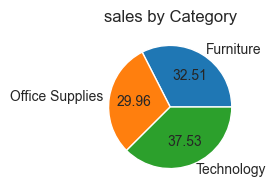

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(2,2))
plt.title('sales by Category')
plt.pie(cat,labels=cat.index,autopct='%.2f')
plt.show()

In [9]:
reg=df.groupby('Region')['Sales'].sum().reset_index()

C:\Users\Prince\AppData\Local\Temp\ipykernel_4656\1775356795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region',y='Sales',data=reg,palette='Set2')


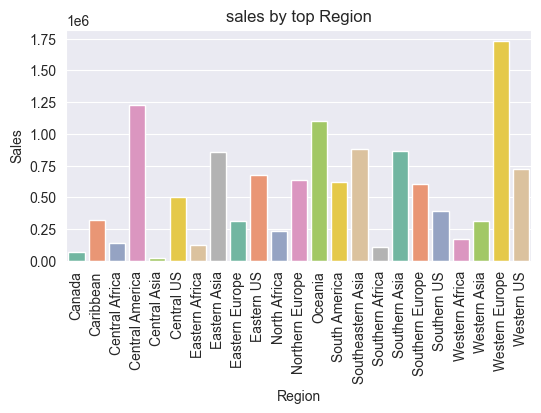

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,3))
plt.title('sales by top Region')
sns.barplot(x='Region',y='Sales',data=reg,palette='Set2')
plt.xticks(rotation=90)
plt.show()

C:\Users\Prince\AppData\Local\Temp\ipykernel_4656\2448529965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country',y='Sales',data=gb,palette='Set2')


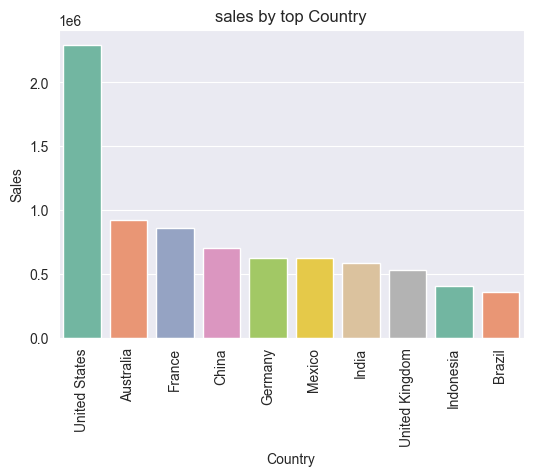

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
plt.title('sales by top Country')
sns.barplot(x='Country',y='Sales',data=gb,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [12]:
us=df[df['Country']=='United States']
us=us.sort_values(by='Sales',ascending=False)[:10]
us


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
47114,33994,CA-2012-SM20320140-40985,3/17/2012,3/22/2012,Standard Class,SM-203201408,Sean Miller,Home Office,32216.0,Jacksonville,...,TEC-MA-3819,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,"-$1,811.08",24.28650,Medium
49003,38123,CA-2014-TC20980140-41915,10/3/2014,10/10/2014,Standard Class,TC-209801402,Tamara Chand,Corporate,47905.0,Lafayette,...,TEC-CO-3691,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,"$8,399.98",349.07000,Medium
44248,39450,CA-2015-RB19360140-42087,3/24/2015,3/26/2015,First Class,RB-193601404,Raymond Buch,Consumer,98115.0,Seattle,...,TEC-CO-3691,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,"$6,719.98",20.00054,Medium
49940,33920,CA-2015-TA21385140-42300,10/23/2015,10/25/2015,First Class,TA-213851406,Tom Ashbrook,Home Office,10024.0,New York City,...,TEC-CO-3691,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.2,"$3,919.99",45.98000,High
25238,35487,CA-2015-HL15040140-42326,11/18/2015,11/23/2015,Standard Class,HL-150401406,Hunter Lopez,Consumer,19711.0,Newark,...,TEC-CO-3691,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,"$5,039.99",363.19000,Medium
419,40336,CA-2014-AB10105140-41991,12/18/2014,12/22/2014,Standard Class,AB-101051402,Adrian Barton,Consumer,48205.0,Detroit,...,OFF-BI-4345,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,"$4,946.37",498.70000,Medium
46295,35395,CA-2012-SC20095140-41174,9/22/2012,9/27/2012,Standard Class,SC-200951402,Sanjit Chand,Consumer,55407.0,Minneapolis,...,OFF-BI-4821,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.0,"$4,630.48",655.61000,Medium
6422,35574,US-2014-BS11365140-41746,4/17/2014,4/21/2014,Standard Class,BS-113651406,Bill Shonely,Corporate,8701.0,Lakewood,...,TEC-MA-2865,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.93,7,0.0,"$2,365.98",516.91000,Medium
46386,39785,CA-2014-SE20110140-41672,2/2/2014,2/4/2014,Second Class,SE-201101408,Sanjit Engle,Consumer,22204.0,Arlington,...,TEC-MA-4768,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.95,5,0.0,"$2,799.98",17.83000,Critical
11063,37722,CA-2014-CC12370140-41783,5/24/2014,5/28/2014,Standard Class,CC-123701406,Christopher Conant,Consumer,19120.0,Philadelphia,...,TEC-CO-3691,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.98,4,0.4,"$1,120.00",498.08000,Medium


C:\Users\Prince\AppData\Local\Temp\ipykernel_4656\2916545274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='Sales',data=us,palette='Set1')


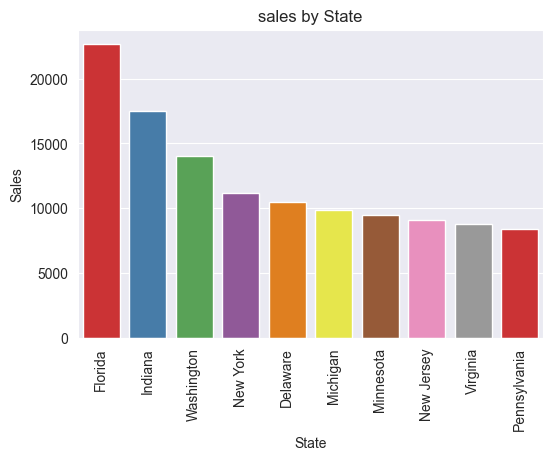

In [13]:
plt.figure(figsize=(6,4))
plt.title('sales by State')
sns.barplot(x='State',y='Sales',data=us,palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [14]:
us['Category']

47114         Technology
49003         Technology
44248         Technology
49940         Technology
25238         Technology
419      Office Supplies
46295    Office Supplies
6422          Technology
46386         Technology
11063         Technology
Name: Category, dtype: object

In [15]:
aus=df[df['Country']=='Australia']
aus=aus.sort_values(by='Sales',ascending=False)[:10]
aus

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1156,28242,ID-2013-SC203057-41488,8/2/2013,8/8/2013,Standard Class,SC-203057,Sean Christensen,Consumer,NaN,Adelaide,...,FUR-CH-4655,Furniture,Chairs,"Hon Executive Leather Armchair, Black",5759.96,14,0.1,-$0.34,187.19,Medium
334,21263,IN-2015-MB173057-42179,6/24/2015,6/28/2015,Standard Class,MB-173057,Maria Bertelson,Consumer,NaN,Sydney,...,FUR-BO-5948,Furniture,Bookcases,"Sauder Classic Bookcase, Metal",5486.67,14,0.1,"$2,316.51",346.60,Medium
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,$919.97,915.49,Medium
201,29968,IN-2015-TA213857-42351,12/13/2015,12/17/2015,Standard Class,TA-213857,Tom Ashbrook,Home Office,NaN,Launceston,...,OFF-AP-4508,Office Supplies,Appliances,"Hamilton Beach Stove, White",4864.32,10,0.1,$162.12,426.09,Medium
198,20861,IN-2012-DR129407-41066,6/6/2012,6/10/2012,Second Class,DR-129407,Daniel Raglin,Home Office,NaN,Townsville,...,OFF-AP-4966,Office Supplies,Appliances,"KitchenAid Stove, Silver",4624.29,9,0.1,"$1,644.03",427.46,Medium
246,26932,IN-2015-GB145307-42260,9/13/2015,9/19/2015,Standard Class,GB-145307,George Bell,Corporate,NaN,Brisbane,...,TEC-CO-4593,Technology,Copiers,"Hewlett Wireless Fax, Laser",4448.22,13,0.1,$444.48,386.38,Medium
58,23499,IN-2015-MW182207-42221,8/5/2015,8/6/2015,First Class,MW-182207,Mitch Webber,Consumer,NaN,Geraldton,...,OFF-AP-3577,Office Supplies,Appliances,"Breville Refrigerator, White",4191.51,9,0.1,"$1,164.27",614.34,High
505,21884,IN-2013-KN163907-41611,12/3/2013,12/10/2013,Standard Class,KN-163907,Katherine Nockton,Corporate,NaN,Kwinana,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",4099.68,10,0.1,$956.58,288.98,Medium
3116,27884,ID-2015-DP131657-42011,1/7/2015,1/11/2015,Standard Class,DP-131657,David Philippe,Consumer,NaN,Albury,...,OFF-AP-3572,Office Supplies,Appliances,"Breville Microwave, Silver",3811.00,14,0.1,-$42.50,96.85,Medium
108,29120,IN-2014-DB130607-41999,12/26/2014,12/26/2014,Same Day,DB-130607,Dave Brooks,Consumer,NaN,Gold Coast,...,OFF-AP-3575,Office Supplies,Appliances,"Breville Refrigerator, Red",3739.18,8,0.1,$747.82,522.79,High


C:\Users\Prince\AppData\Local\Temp\ipykernel_4656\956494153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='Sales',data=aus,palette='husl')


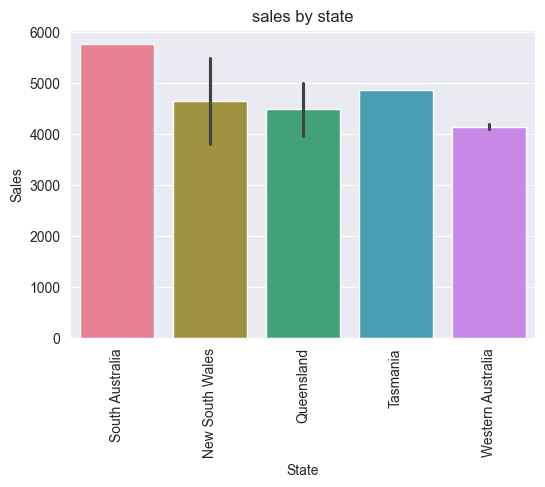

In [16]:
plt.figure(figsize=(6,4))
plt.title('sales by state')
sns.barplot(x='State',y='Sales',data=aus,palette='husl')
plt.xticks(rotation=90)
plt.show()

In [17]:
aus['Category']

1156          Furniture
334           Furniture
2            Technology
201     Office Supplies
198     Office Supplies
246          Technology
58      Office Supplies
505           Furniture
3116    Office Supplies
108     Office Supplies
Name: Category, dtype: object

In [27]:
f=df[df['Country']=='France']
f=f.sort_values(by='Sales',ascending=False)[:10]
f['State']


80              Nord-Pas-de-Calais-Picardie
185                           Ile-de-France
1026             Provence-Alpes-Côte d'Azur
118      Languedoc-Roussillon-Midi-Pyrénées
105              Provence-Alpes-Côte d'Azur
1446            Nord-Pas-de-Calais-Picardie
99                            Ile-de-France
316                           Ile-de-France
2009      Alsace-Champagne-Ardenne-Lorraine
750     Aquitaine-Limousin-Poitou-Charentes
Name: State, dtype: object

C:\Users\Prince\AppData\Local\Temp\ipykernel_4656\550872991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='Sales',data=f,palette='husl')


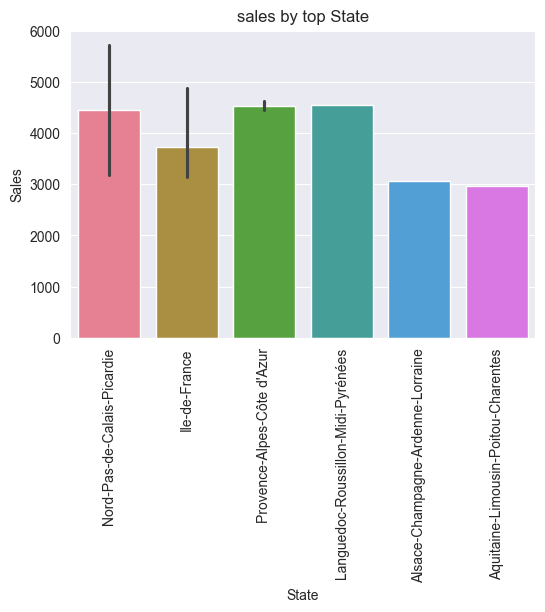

In [19]:
plt.figure(figsize=(6,4))
plt.title('sales by top State')
sns.barplot(x='State',y='Sales',data=f,palette='husl')
plt.xticks(rotation=90)
plt.show()

In [20]:
f['Category']

80            Furniture
185          Technology
1026    Office Supplies
118           Furniture
105          Technology
1446          Furniture
99      Office Supplies
316     Office Supplies
2009          Furniture
750           Furniture
Name: Category, dtype: object